In [1]:
#meta 7/14/2019
#Source: Great Courses - Mathematical Decision Making
#L8 Linear Programming and Optimal Network Flow

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

A linear program is an optimization model. 

### Linear Programs: Geometric
In multiple regression, we can talk about a linear function of more than one variable. If we have two inputs, we can visualize this as a tabletop in which every position on the table is represented by a pair of x and y coordinates. A function of these two variables is represented by a surface hovering over that tabletop.

### Linear Programs: Algebraic
i.e. 2x + 3y + 4

### Application: a limited resource constraint. 
Number of units use <= number of units available.

Suppose that during a 40-hour workweek, a building inspector can inspect either 80 houses or 10 farms.  
What math represents the number of hours the inspector spends inspecting this week if he or she inspects H houses and F farms?

The problem implies that each farm takes the same amount of time and each house takes the same amount of time. That makes the expression linear. 

1.  Find the constant term    
If we set both H and F equal to zero, the inspector doesn’t inspect anything, so he or she spends no time inspecting. That’s how we find the contstant term: it's zero.

2.  Coefficients  
If H goes up by one—which means that the inspector inspects one more house— then how much does “the thing underneath”—the hours used—go up? 

In [3]:
#given
n_hours_min = 0
n_hours_max = 40
n_houses_in40 = 80
n_farms_in40 = 10

#calculate rate
#One more house increases time used by how much (in hrs)?
h_rate = n_hours_max / n_houses_in40
#One more farm increases time used by how much (in hrs)?
f_rate = n_hours_max / n_farms_in40
print ('Rate for houses (hr/units): {}'.format(h_rate))
print ('Rate for farms (hr/units): {}'.format(f_rate))

Rate for houses (hr/units): 0.5
Rate for farms (hr/units): 4.0


3.  Don't forget time constraint
Work week max # of hours is 40

Algebraically: 0.5H + 4F + 0 < = 40 hrs

### Optimal hours

How many units can inspect in one week?

In [4]:
h_max = (n_hours_max / h_rate)
print('In 1 week can inspect up to {} houses'.format(h_max))
f_max = (n_hours_max / f_rate)
print('In 1 week can inspect up to {} farms'.format(f_max))


In 1 week can inspect up to 80.0 houses
In 1 week can inspect up to 10.0 farms


In [5]:
#possibiliites
h = np.arange(n_hours_min, h_max + 1, dtype = np.int8)
f = np.arange(n_hours_min, f_max +1, dtype = np.int8) 

h_hrs = h * h_rate
f_hrs = f * f_rate
#array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.])

print('Can inspect 1 house in  {} hours'.format(h_rate))
print('Can inspect 1 farm in  {} hours'.format(f_rate))

Can inspect 1 house in  0.5 hours
Can inspect 1 farm in  4.0 hours


(manually) Build a matrix of total hours

if total hours > max hours, then invalidate that option with -1

In [6]:
#initialize matrix to store total hours for all possible H & F combinations
mx_rows = len(h)
mx_cols = len(f)
mx = np.zeros((mx_rows, mx_cols), dtype=float)

for i in h:
    for j in f:
        total_hrs = h_hrs[i] + f_hrs[j]
        if total_hrs > n_hours_max:
            total_hrs = -1
        mx[i,j] =  total_hrs

#view matrix of total hours
print ('All possible total hours combinations:')
mx

All possible total hours combinations:


array([[ 0. ,  4. ,  8. , 12. , 16. , 20. , 24. , 28. , 32. , 36. , 40. ],
       [ 0.5,  4.5,  8.5, 12.5, 16.5, 20.5, 24.5, 28.5, 32.5, 36.5, -1. ],
       [ 1. ,  5. ,  9. , 13. , 17. , 21. , 25. , 29. , 33. , 37. , -1. ],
       [ 1.5,  5.5,  9.5, 13.5, 17.5, 21.5, 25.5, 29.5, 33.5, 37.5, -1. ],
       [ 2. ,  6. , 10. , 14. , 18. , 22. , 26. , 30. , 34. , 38. , -1. ],
       [ 2.5,  6.5, 10.5, 14.5, 18.5, 22.5, 26.5, 30.5, 34.5, 38.5, -1. ],
       [ 3. ,  7. , 11. , 15. , 19. , 23. , 27. , 31. , 35. , 39. , -1. ],
       [ 3.5,  7.5, 11.5, 15.5, 19.5, 23.5, 27.5, 31.5, 35.5, 39.5, -1. ],
       [ 4. ,  8. , 12. , 16. , 20. , 24. , 28. , 32. , 36. , 40. , -1. ],
       [ 4.5,  8.5, 12.5, 16.5, 20.5, 24.5, 28.5, 32.5, 36.5, -1. , -1. ],
       [ 5. ,  9. , 13. , 17. , 21. , 25. , 29. , 33. , 37. , -1. , -1. ],
       [ 5.5,  9.5, 13.5, 17.5, 21.5, 25.5, 29.5, 33.5, 37.5, -1. , -1. ],
       [ 6. , 10. , 14. , 18. , 22. , 26. , 30. , 34. , 38. , -1. , -1. ],
       [ 6.5, 10.5, 14.5,

Find Max value

In [7]:
#find max value
#mx_max = mx.max()
mx_max = np.amax(mx) #alternative way
print('Optimal # of hours worked is {}'.format(mx_max))

Optimal # of hours worked is 40.0


Find optimal units combinations  
- Find first occurence of optimal # of hours

In [8]:
#find 1st location of best combination
#refer https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.argmax.html
#In case of multiple occurrences of the maximum values, the indices corresponding to the first occurrence are returned.

mx_idx_max = np.unravel_index(np.argmax(mx, axis=None), mx.shape)
mx_idx_max

(0, 10)

- Find all occurences of optimal # of hours

In [9]:
#refer https://docs.scipy.org/doc/numpy/reference/generated/numpy.argwhere.html
mx_best = np.argwhere ( mx == np.amax(mx))
mx_best

array([[ 0, 10],
       [ 8,  9],
       [16,  8],
       [24,  7],
       [32,  6],
       [40,  5],
       [48,  4],
       [56,  3],
       [64,  2],
       [72,  1],
       [80,  0]])

Interpet the results:
x # of houses and y # of farms will result in max 40 hours worked.

In [10]:
#ie.
mx[8,9]

40.0

### Add Inspeciton Price 
to decide what option should work on and generate max revenue

In [11]:
#set prices
h_price = 500
f_price = 3000

price_vector = [h_price, f_price]

Don't (manually) build a matrix of total revenues.  Already know the best combinations of units to work on that maximizes total hours.  Only figure out best revenue out of these pre-selected options.

In [12]:
rev_total = mx_best * price_vector
for i in rev_total:
    print (i.sum())

30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000


Manually, see that the last option (80 houses and 0 farms) generates most revenue of 40,000 dollars.  10,000 dollars more than if did 0 houses and 10 farms.  If driving around 80 houses is worth 10K more, go for it.  (this analysis doesn't go into optimizing other factors, i.e. cost).

Computationally, interested to see how to find best combo considering optimal revenue generated with one matrix.  Back to (manually) building a matrix.  Also, want to see if optimal revenue will come a set of optimal hours worked?

In [13]:
#initialize matrix to store total hours for all possible H & F combinations
mx_rev = np.zeros((mx_rows, mx_cols), dtype=int)

for i in h:
    for j in f:
        total_hrs = h_hrs[i] + f_hrs[j] 
        if total_hrs > n_hours_max:
            total_rev = -1
        else:
            total_rev = i * h_price + j * f_price
        mx_rev[i,j] =  total_rev

#view matrix of total hours
print ('All possible revenue combinations:')

#np.set_printoptions(suppress=True)
mx_rev

All possible revenue combinations:


array([[    0,  3000,  6000,  9000, 12000, 15000, 18000, 21000, 24000,
        27000, 30000],
       [  500,  3500,  6500,  9500, 12500, 15500, 18500, 21500, 24500,
        27500,    -1],
       [ 1000,  4000,  7000, 10000, 13000, 16000, 19000, 22000, 25000,
        28000,    -1],
       [ 1500,  4500,  7500, 10500, 13500, 16500, 19500, 22500, 25500,
        28500,    -1],
       [ 2000,  5000,  8000, 11000, 14000, 17000, 20000, 23000, 26000,
        29000,    -1],
       [ 2500,  5500,  8500, 11500, 14500, 17500, 20500, 23500, 26500,
        29500,    -1],
       [ 3000,  6000,  9000, 12000, 15000, 18000, 21000, 24000, 27000,
        30000,    -1],
       [ 3500,  6500,  9500, 12500, 15500, 18500, 21500, 24500, 27500,
        30500,    -1],
       [ 4000,  7000, 10000, 13000, 16000, 19000, 22000, 25000, 28000,
        31000,    -1],
       [ 4500,  7500, 10500, 13500, 16500, 19500, 22500, 25500, 28500,
           -1,    -1],
       [ 5000,  8000, 11000, 14000, 17000, 20000, 23000, 260

Find best combination with max revenue

In [14]:
np.amax(mx_rev)

40000

In [15]:
mx_rev_best = np.argwhere ( mx_rev == np.amax(mx_rev))
mx_rev_best

array([[80,  0]])

Conclusion: Yes, optimal revenue happens with an option from a set of optimal hours: by working on 80 houses and 0 farms.

### Plot - 3D
#### Optimal hours geometrically

In [16]:
from mpl_toolkits import mplot3d

In [17]:
#prep data for graphing
x = np.repeat(h, mx_cols)
y = np.tile(f, mx_rows)
z = mx.flatten()

#preview result sets
xyz = zip(x,y,z)
print(list(xyz)[:15])

[(0, 0, 0.0), (0, 1, 4.0), (0, 2, 8.0), (0, 3, 12.0), (0, 4, 16.0), (0, 5, 20.0), (0, 6, 24.0), (0, 7, 28.0), (0, 8, 32.0), (0, 9, 36.0), (0, 10, 40.0), (1, 0, 0.5), (1, 1, 4.5), (1, 2, 8.5), (1, 3, 12.5)]


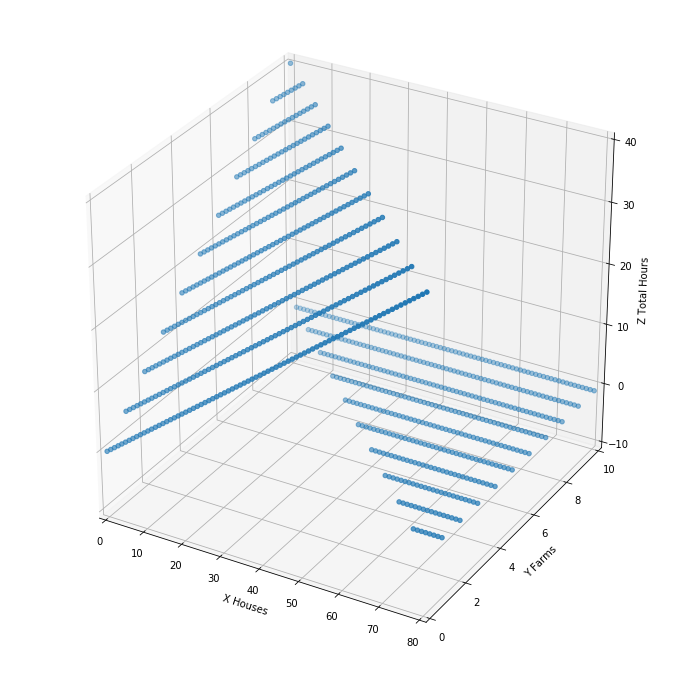

In [18]:
#refer https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
plt.figure(figsize=(12,12))

ax = plt.axes(projection='3d')

ax.set_xlabel('X Houses')
ax.set_ylabel('Y Farms')
ax.set_zlabel('Z Total Hours');

ax.set_xlim(0, 80); ax.set_ylim(0, 10); ax.set_zlim(-10, 40);

# Data for three-dimensional scattered points
zdata = z
xdata = x
ydata = y
ax.scatter3D(xdata, ydata, zdata );

The plot shows how multiple x + y combinations produce total optimal 40 hours.

#### Optimal Revenue geometrically

In [19]:
#prep data for graphing
z_rev = mx_rev.flatten()

#preview result sets
xyz_rev = zip(x,y,z_rev)
print(list(xyz_rev)[-15:])

[(79, 7, -1), (79, 8, -1), (79, 9, -1), (79, 10, -1), (80, 0, 40000), (80, 1, -1), (80, 2, -1), (80, 3, -1), (80, 4, -1), (80, 5, -1), (80, 6, -1), (80, 7, -1), (80, 8, -1), (80, 9, -1), (80, 10, -1)]


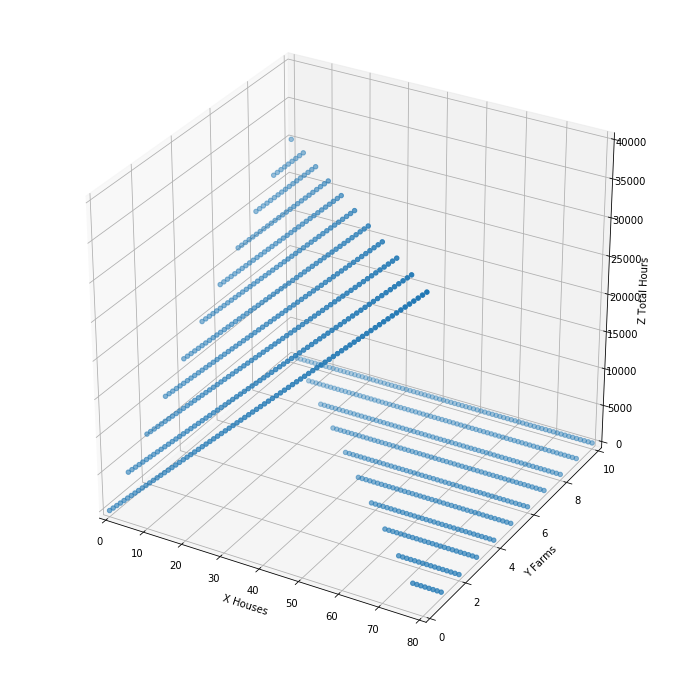

In [20]:
plt.figure(figsize=(12,12))

ax = plt.axes(projection='3d')

ax.set_xlabel('X Houses')
ax.set_ylabel('Y Farms')
ax.set_zlabel('Z Total Hours');

ax.set_xlim(0, 80); ax.set_ylim(0, 10); ax.set_zlim(-10, 40000);

# Data for three-dimensional scattered points
zdata = z_rev
xdata = x
ydata = y
ax.scatter3D(xdata, ydata, zdata );

The plot shows the best x + y combination that produce optimal 40,000 dolars revenue.

### Xtras

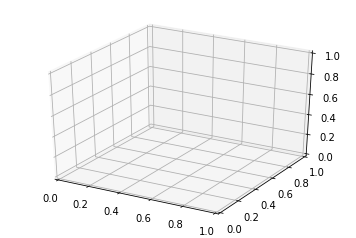

In [21]:
#$xtra
#refer https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

fig = plt.figure()
ax = plt.axes(projection='3d')

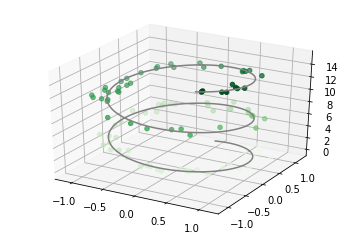

In [22]:
#$xtra
#refer https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');